In [0]:
import numpy as np
#!pip install pmdarima
import matplotlib.pyplot as plt
import pandas as pd
#from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
import statsmodels.api as sm
from scipy import stats
from itertools import product
from datetime import datetime
import seaborn as sns
import warnings

In [0]:
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
df1 = pd.read_csv("/content/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

In [0]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], unit='s')
df1.set_index('Timestamp', inplace=True)
df1 = df1.resample('D').mean()

In [0]:
df1.head()
df1_month = df1.resample('M').mean()

In [0]:
#plt.figure(figsize= [77,15])
#df1_month = df1.resample('M').mean()
#seasonal_decompose(df1_month['Weighted_Price'].dropna()).plot()
#print('p value: %f' %adfuller(df1_month['Weighted_Price'])[1])
#plt.show()

In [0]:
df1_month['diff1'] = df1_month['Weighted_Price'] - df1_month['Weighted_Price'].shift(12)
#print("p value: %f" %adfuller(df1_month['diff1'][12:])[1])

In [0]:
df1_month['diff2'] = df1_month['diff1'] - df1_month['diff1'].shift(1)
#plt.figure(figsize= (17,7))

seasonal_decompose(df1_month['diff2'][13:]).plot()
#print('p value: %f' %adfuller(df1_month['diff2'][13:])[1])

#plt.show()

In [0]:
#plt.figure(figsize= (17,9))
##ax = plt.subplot(211)
#plot_acf(df1_month['diff2'][13:].values.squeeze(), ax = ax)

#ax = plt.subplot(212)
#plot_pacf(df1_month['diff2'][13:].values.squeeze(), ax = ax)
#plt.tight_layout()
#plt.show()

In [0]:
Q = range(0,2)
q = range(0,3)
P = range(0,3)
p = range(0,3)
D = 1
d = 1
parameters = product(p,q, P, Q)
parameters_list = list(parameters)
len(parameters_list)

res = []
ai = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
  try:
    model = sm.tsa.statespace.SARIMAX(df1_month['Weighted_Price'], order = (param[0], d, param[1]),
                                      seasonal_order = (param[2], D, param[3], 11)).fit(disp = -1)
  except ValueError:
    continue
  aic = model.aic
  if aic < ai:
    ml = model
    ai = aic
    para = param
  res.append([param, model.aic])

In [0]:
#retab = pd.DataFrame(res)
#retab.columns = ['Parameters', 'aic']
#print(retab.sort_values(by = 'aic', ascending = True).head())
#rint(ml.summary())

p value: 0.000034


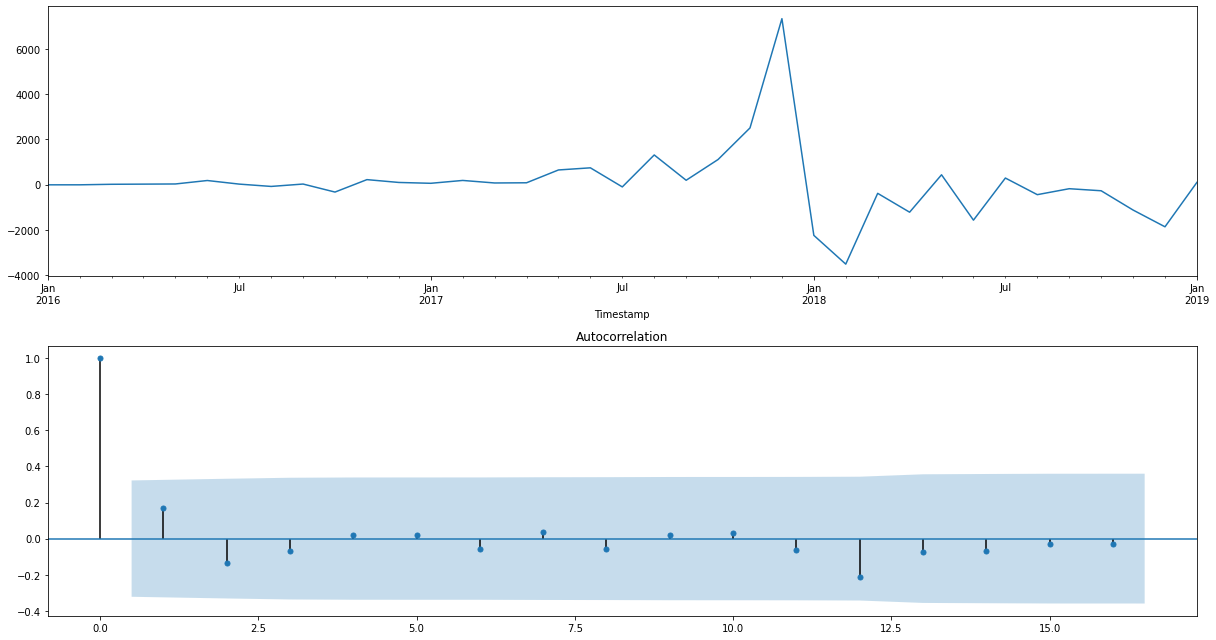

In [0]:
#plt.figure(figsize= (17,9))
#plt.subplot(211)
#ml.resid[13:].plot()
#ax = plt.subplot(212)
#plot_acf(ml.resid[13:].values.squeeze(), ax = ax)
#print('p value: %f' %adfuller(ml.resid[13:])[1])
#plt.tight_layout()
#plt.show()


In [0]:
df1_month2 = df1_month[['Weighted_Price']]
date_list = [datetime(2019, 9, 30), datetime(2019, 10, 31), datetime(2019, 11, 30), datetime(2019, 12, 31), datetime(2020, 1, 31), datetime(2020, 2, 29), datetime(2020, 3, 31), datetime(2020, 4, 30), datetime(2020, 5, 31)]
ft = pd.DataFrame(index= date_list, columns= df1_month.columns)
df1_month2 = pd.concat([df1_month2, ft])
df1_month2['forecast'] = ml.predict(start= 0, end = 60)
plt.figure(figsize= (17,9))
df1_month2['Weighted_Price'].plot()
df1_month2['forecast'].plot(color = 'g')
plt.legend()
plt.show()